In [3]:
import networkx as nx
import math
import numpy as np

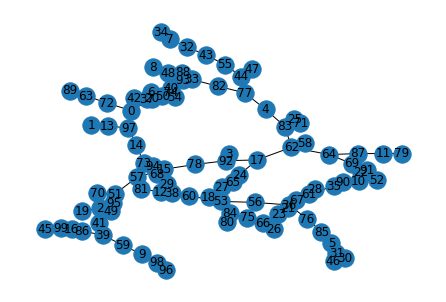

In [4]:
tree = nx.random_tree(n=100)
nx.draw(tree, with_labels=True)

In [5]:
Frechet_mean = -1
y_hat = -1
for node in list(tree.nodes):
    node_dist = 0
    for target in list(tree.nodes):
        dist = nx.shortest_path_length(tree, source=node, target=target)
        node_dist += 1 * dist **2
    if Frechet_mean == -1:
        Frechet_mean = node_dist
        y_hat = node 
    else:
        if Frechet_mean > node_dist:
            Frechet_mean = node_dist
            y_hat = node
print(Frechet_mean, y_hat)

6656 17


In [6]:
def generate_lambda(theta, m):
    z = 0
    for node in list(tree.nodes):
        z_temp = math.exp(-theta * nx.shortest_path_length(tree, source=node, target=y_hat))
        z += z_temp
    p_list = []
    for node in list(tree.nodes):
        p = 1/z * math.exp(-theta * nx.shortest_path_length(tree, source=node, target=y_hat))
        p_list.append(p)
    array = np.array(list(tree.nodes))
    Lambda = np.random.choice(array, m, replace=False, p = p_list)
    return Lambda

In [7]:
def generate_locus(Lambda):
    locus = []
    for i in range(len(Lambda)):
        for j in range(i+1, len(Lambda)):
            for path in nx.all_simple_paths(tree,Lambda[i], Lambda[j]):
                for node in path:
                    if node not in locus:
                        locus.append(node)
    return locus

In [40]:
m = 30
theta_list = []
theta = 0
while theta <= 4:
    theta_list.append(theta)
    theta += 0.04

In [41]:
locus_list = []
for theta in theta_list:
    total_locus = 0
    for i in range(5):
        Lambda = generate_lambda(theta, m)
        locus = generate_locus(Lambda)
        total_locus += len(locus)
    avg_locus = total_locus//5
    locus_list.append(avg_locus)

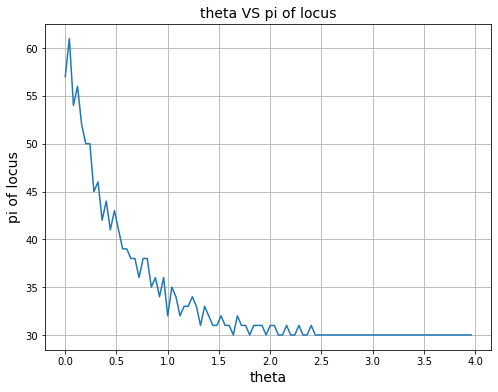

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(theta_list, locus_list)
plt.title('theta VS pi of locus', fontsize=14)
plt.xlabel('theta', fontsize=14)
plt.ylabel('pi of locus', fontsize=14)
plt.grid(True)
plt.show()

In [8]:
m = 30
theta_list = []
theta = 0
while theta <= 4:
    theta_list.append(theta)
    theta += 0.1

In [14]:
locus_list = []
error_bar = []
for theta in theta_list:
    total_locus = 0
    sample = []
    for i in range(10):
        Lambda = generate_lambda(theta, m)
        locus = generate_locus(Lambda)
        total_locus += len(locus)
        sample.append(len(locus))
    avg_locus = total_locus/10
    error = np.quantile(sample, 0.75) -  np.quantile(sample, 0.25)
    locus_list.append(avg_locus)
    error_bar.append(error)

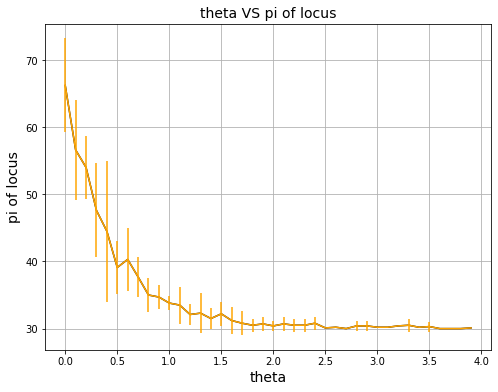

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(theta_list, locus_list, color = "black")
plt.errorbar(theta_list, locus_list, yerr = error_bar, color = "orange")
plt.title('theta VS pi of locus', fontsize=14)
plt.xlabel('theta', fontsize=14)
plt.ylabel('pi of locus', fontsize=14)
plt.grid(True)
plt.show()

In [18]:
import numpy as np
yerr = np.linspace(0.05, 0.2, 10)
# x = np.quantile(locus_list, [0,0.25,0.5,0.75,1])

# print(x)

In [9]:
a = [1,3,5,2,13,6,4,8,9,14]
x = np.quantile(a, [0,0.25,0.5,0.75,1])
x

array([ 1.  ,  3.25,  5.5 ,  8.75, 14.  ])

In [11]:
np.quantile(a, 0.25)

3.25